### Initial Setup

Import the necessary packages.

In [74]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Set the path to where the munged data is located.

In [75]:
path_to_data = '/home/bsknight/Documents/Personal_Training_Git/Udacity/Udacity-Machine_Learning_Nanodegree/' + \
               'Capstone_Project/Data' 
os.chdir(path_to_data)

Read in the data.

In [76]:
df = pd.read_csv('./munged_df.csv', index_col='account_id')
len(df)

16607

Extract the features and labels.

In [77]:
# Extract feature columns
feature_cols = list(df.columns[:-1])

# Extract target column 'passed'
target_col = df.columns[-1] 

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = df[feature_cols]
y_all = df[target_col] 

Scale the features

In [78]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_all = scaler.fit_transform(X_all)

Split the data into training and testing sets.

In [79]:
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all , 
                                                    y_all, 
                                                    stratify=y_all,
                                                    test_size=0.5, 
                                                    random_state=1)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 8303 samples.
Testing set has 8304 samples.


### Implementating PCA

Apply PCA to the training data.

In [80]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 4)
# pca = pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_train = pd.DataFrame(X_train, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4'])
# print(pca.explained_variance_ratio_) 

In [81]:
# X_test = pca.transform(X_test)

### Creating the Classifier

Create the SVM classifier with a RBF kernel.

In [82]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train) 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [83]:
from sklearn.metrics import precision_recall_curve
y_score = clf.fit(X_train, y_train).decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

In [84]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

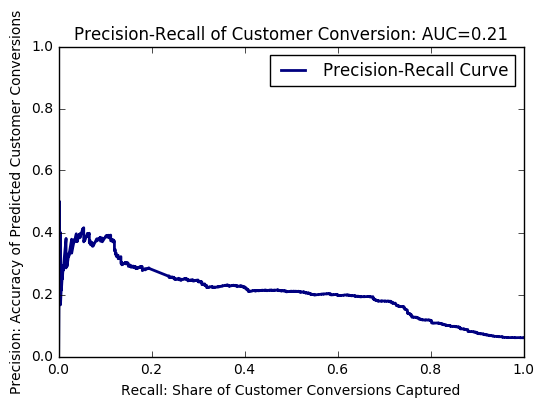

In [85]:
plt.clf()
lw = 2
plt.plot(recall, precision, lw=lw, color='navy',
         label='Precision-Recall Curve')
plt.legend(loc="upper right")
plt.xlabel('Recall: Share of Customer Conversions Captured')
plt.ylabel('Precision: Accuracy of Predicted Customer Conversions')
plt.title('Precision-Recall of Customer Conversion: AUC={0:0.2f}'.format(average_precision))
plt.show()

In [ ]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.metrics import make_scorer, f1_score

# from sklearn.cross_validation import GridSearchCV
from sklearn import grid_search

# TODO: Create the parameters list you wish to tune
parameters = {  
            'C':           [1e-2, 1e-1, 1, 1e1, 1e2],
            'gamma':       [1e-2, 1e-1, 1, 1e1, 1e2],
            'degree':      [1,2,3,4],
            'shrinking':   [True, False],
            'probability': [True, False],
            'kernel':      ['linear', 'poly', 'rbf', 'sigmoid']
             }

# TODO: Initialize the classifier
clf = SVC(random_state=1)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = grid_search.GridSearchCV(clf, parameters, scoring=f1_scorer, n_jobs=-1)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print clf
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(
        clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(
        clf, X_test, y_test))